## GAAIMS: Predicting Multiple Sclerosis from Dynamics of Gait Variability Using an Instrumented Treadmill - A Machine Learning-Based Approach

### Correlation of proportion of correct strides with age and EDSS - Trial and Person generalization ML models 


### Package imports 

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import math
import os
from ast import literal_eval
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import copy

import xgboost 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.externals import joblib
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from inspect import signature
from scipy import interp
from pyitlib import discrete_random_variable as drv
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GroupKFold
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.neural_network import MLPClassifier
import itertools
import warnings
warnings.filterwarnings("ignore")

### Trial generalization model

In [74]:
path1 = 'C:\\Users\\rk4\\Dropbox\\GAIT\\sample_data\\trial_generalize\\'

In [75]:
#Reading the GBM Regress-N trial generalize probabilities for class - 1
trial = pd.read_csv(path1+'trial_generalize_ROCresults_regressN_data.csv', index_col = 0)
trial_GBM = trial['gbm']

#Converting probability of class 1 to proportion of correct strides 
trial_GBM[trial_GBM.index<300]= 1-trial_GBM[trial_GBM.index<300] #Proportion of correct strides 

In [76]:
#Age
demo = pd.read_csv(path1 + '..\\demographics.csv')
demo.set_index('subject ID', inplace = True)
age = demo.loc[trial_GBM.index][ 'age (yrs)'] #Keeping only the age of the person

In [77]:
#EDSS
edss = pd.read_csv(path1 + '..\\..\\EDSS.csv')
edss.set_index('PID', inplace = True)
edss = edss.loc[trial_GBM[trial_GBM.index>=300].index] #Keeping only the PwMS matching with trial_GBM

In [83]:
#Conactenating 
trial_GBM_concat = pd.concat([trial_GBM, age, edss], axis =1)

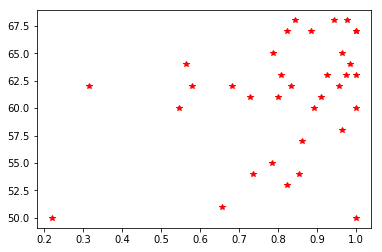

In [86]:
plt.plot(trial_GBM_concat['gbm'], trial_GBM_concat['age (yrs)'], 'r*')
         

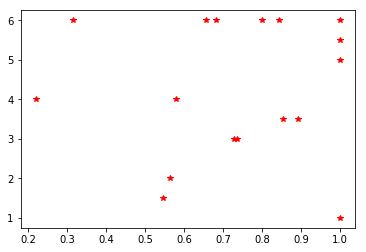

In [89]:
plt.plot(trial_GBM_concat['gbm'], trial_GBM_concat['EDSS'], 'r*')

### Subject generalization model

In [112]:
#Proportion of correct strides in subject generalization using regressN and MLP
cohort = pd.DataFrame(data = {203: [0.888889], 217: [0.808511], 218: [0.235294], 305: [0.610687], 313:  [0.803279],\
202:  [0.195122],   207:  [0.650485], 208:  [0.739583],   303:  [0.096000],   307:  [0.680000], 209:  [0.571429], 214:  [0.783333],  215:  [0.605769],  304:  [0.483146],  318:  [1.000000], 205:  [0.844037], 211:  [0.670103], 216:  [0.538462], 320:  [0.620690], 321:  [0.895833], 204:  [0.935780], 306:  [0.117647], 312:  [0.887755], 322:  [0.555556], 323:  [0.094828],201:  [0.904110], 206:  [0.720000],  300:  [0.559524], 301:  [0.809091], 308:  [0.796460], \
200:  [0.022727], 210:  [0.553571], 219:  [0.867347], 302:  [0.919643],  314:  [1.000000]})                                                                                                                    
cohort = cohort.T
cohort.columns = ['mlp']
cohort.sort_index(inplace=True)

In [114]:
#Conactenating 
cohort_MLP_concat = pd.concat([cohort, age, edss], axis =1)

In [128]:
cohort_MLP_concat['color'] = 'r'

In [130]:
cohort_MLP_concat['color'][cohort_MLP_concat.index<300] = 'g'

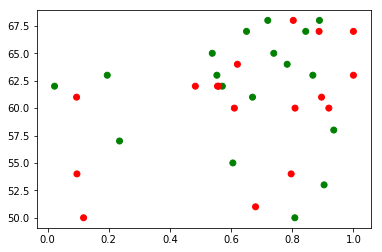

In [139]:
plt.scatter(cohort_MLP_concat['mlp'], cohort_MLP_concat['age (yrs)'], color = cohort_MLP_concat['color'], marker = 'o')
plt.show()

In [122]:
cohort_MLP_concat[['mlp', 'age (yrs)']].groupby('age (yrs)').mean()

,mlp
age (yrs),
50,0.463079
51,0.680000
53,0.904110
54,0.446230
55,0.605769
57,0.235294
58,0.935780
60,0.779807
61,0.553588


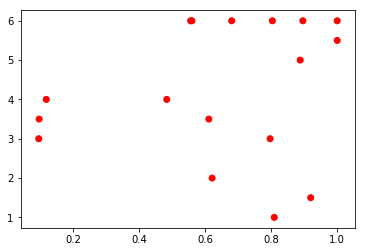

In [141]:
plt.scatter(cohort_MLP_concat['mlp'], cohort_MLP_concat['EDSS'], color = cohort_MLP_concat['color'], marker = 'o')
plt.show()

In [127]:
cohort_MLP_concat[['mlp', 'EDSS']]

,mlp,EDSS
PID,,
200,0.022727,NaN
201,0.904110,NaN
202,0.195122,NaN
203,0.888889,NaN
204,0.935780,NaN
205,0.844037,NaN
206,0.720000,NaN
207,0.650485,NaN
208,0.739583,NaN


In [121]:
cohort_MLP_concat[['mlp', 'EDSS']].groupby('EDSS').mean()

,mlp
EDSS,
1.0,0.809091
1.5,0.919643
2.0,0.620690
3.0,0.445644
3.5,0.353343
4.0,0.300397
5.0,0.887755
5.5,1.000000
6.0,0.749032


In [126]:
(0.809091+0.919643+0.620690)/3, (0.445644+0.353343+0.300397)/3, (0.887755+1.000000+0.749032)/3

(0.7831413333333334, 0.36646133333333336, 0.878929)